# Tarea 6 iPython
## Semana 8
## SEC-05

La solución debe subirse a SicuaPlus en un único archivo con el nombre $\verb|NombreApellido_hw6.ipynb|$ antes de que termine la clase. Todos los puntos deben resolverse en este **mismo cuaderno**.

En este ejercicio exploraremos con una mayor profundidad el uso de clases para la solución de un problema, además de familiarizarnos con el entorno de programación interactivo en el cuaderno de **iPython**.

Los vectores en el plano son descritos por una pareja de coordenadas $(x,y)$, los cuales tienen reglas especiales para la suma, resta, multiplicación (producto interno), la norma del vector y la multiplicación por escalar.

$$(a,b)+(c,d) = (a+c,b+d)$$
$$(a,b)-(c,d) = (a-c,b-d)$$
$$ (a,b) \cdot (c,d) = ac+bd$$
$$||(a,b)|| = \sqrt{a^2+b^2}$$

Además, para que dos vectores sean iguales sus componentes deben ser iguales, es decir a=b y c=d.

## Punto 1 (2.5)
Escriba la clase **VEC2D** la cual modele un vector en el plano $xy$. La clase debe tener los siguientes métodos:

1. **Suma**: retorna un objeto **VEC2D** que corresponde a la suma del vector con otro que entra por parámetro.
2. **Resta**: retorna un objeto **VEC2D** que corresponde a la resta del vector con otro que entra por parámetro.
3. **Producto**: retorna el valor del producto interno entre el vector actual y uno dado por parámetro.
4. **Norma**: calcula y retorna la norma del vector.
5. **ProdEscalar**: calcula y retorna un objeto **VEC2D** correspondiente al producto de este vector por una escalar $C$ dada por parámetro.
6. **Equals**: Debe indicar si el vector es igual al vector que llega por parámetro.
7. **Imprimir**: imprime el vector con el formato $(x,y) = (V_x,V_y)$ donde $V_x$ y $V_y$ corresponden a los valores de las componentes del vector.

Recuerde que en Python los atributos de un objeto son públicos y pueden ser llamados de la forma *vector.x* para retornar la componente del vector en la coordenada *x*. Importe la librería pylab *(%pylab inline)* antes de generar la clase para poder utilizar la función de raíz cuadrada (sqrt()).

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
class VEC2D:
    def __init__(self,x0,y0):
        self.x = x0
        self.y = y0
        
    def Suma(self,vector):
        return VEC2D(self.x+vector.x,self.y+vector.y)
    
    def Resta(self,vector):
        return VEC2D(self.x-vector.x,self.y-vector.y)
    
    def Producto(self,vector):
        return self.x*vector.x+self.y*vector.y
    
    def Norma(self):
        return sqrt(self.x**2+self.y**2)
    
    def ProdEscalar(self,C):
        return VEC2D(self.x*C,self.y*C)
    
    def Equal(self,vector):
        return self.x==vector.x and self.y==vector.y
    
    def imprimir(self):
        print "(x,y)=(",self.x,",",self.y,")"

## Punto 2 (1.0)

Cree 4 objetos de tipo **VEC2D** cuyas componentes sean números enteros y nómbrelos $V_1,V_2,V_3,V_4$. Realice e imporima las siguientes operaciones:

1. $V_1+(V_2\cdot V_4)*V_4$
2. $||V_4-V_1||/||V_2+V_3||$
3. Comprobar sí $V_1+2*V_3$ es igual a $5*V_2-10V_4$

In [20]:
#Objetos
v1=VEC2D(1,0)
v2=VEC2D(0,1)
v3=VEC2D(1,1)
v4=VEC2D(2,2)

#1
r1 = v1.Suma(v4.ProdEscalar(v2.Producto(v4)))
print "1."
r1.imprimir()

#2
r2a = v4.Resta(v1)
r2b = v2.Suma(v3)
print "2."
print r2a.Norma()/r2b.Norma()

#3
print "3"
r3a = v1.Suma(v3.ProdEscalar(2))
r3b = (v2.ProdEscalar(5)).Resta(v4.ProdEscalar(10))
print r3a.Equal(r3b)

1.
(x,y)=( 5 , 4 )
2.
1.0
3
False


## Punto 3 (1.5)

Se quiere simular el comportamiento de la velocidad en un movimiento de caida libre, para esto:
1. Cree un vector con las coordenadas $(0,50)$ que modela la velocidad inicial ($v_0$) de la partícula.
2. Defina las variables $g=9.8, \Delta t=0.005$
4. Recordando que la evolución de la velocidad en caida libre está dada por la ecuación $v_{i+1}=v_{i}-g\Delta t$, simule el comportamiento de la velocidad por 10s, como se hizo en el video sobre programación orientada a objetos. Se recomienda crear un vector que tome el valor $(0,g*t)$
5. Grafique la evolución temporal de la velocidad en $y$.


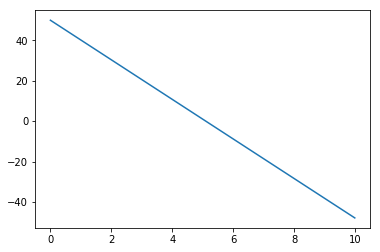

In [23]:
vel = VEC2D(0,50)
g,dt = 9.8,0.005
t = 0
listaTiempos = []
listaVel = []
vect =VEC2D(0,g*dt)

while t<=10:
    listaTiempos.append(t)
    listaVel.append(vel.y)
    vel = vel.Resta(vect)
    t+=dt

plot(listaTiempos,listaVel)